In [1]:
import os
import struct
import numpy as np

def load_mnist(path, kind='train'):
    """Load MINST data from path"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte'
                               % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                         dtype=np.uint8).reshape(len(labels), 784)
                             
    return images, labels

In [2]:
X_train, y_train = load_mnist('mnist', kind='train')
print('Rows: %d, columns: %d'
      % (X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [3]:
X_test, y_test = load_mnist('mnist', kind='t10k')
print('Rows: %d, columns: %d'
      % (X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


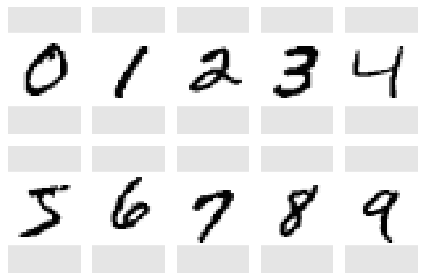

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True,
                       sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

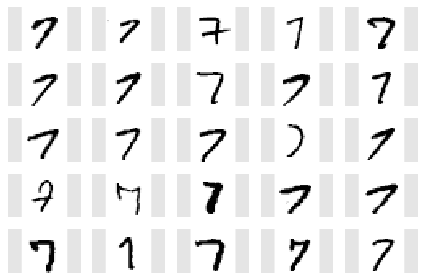

In [5]:
# Plot several of the same digits to see different
# handwriting styles
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True,
                       sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [6]:
from neuralnet import NeuralNetMLP

nn = NeuralNetMLP(n_output=10,
                  n_features=X_train.shape[1],
                  n_hidden=50,
                  l2=0.1,
                  l1=0.0,
                  epochs=1000,
                  eta=0.001,
                  alpha=0.001,
                  decrease_const=0.00001,
                  shuffle=True,
                  minibatches=50,
                  random_state=1)

In [7]:
nn.fit(X_train, y_train, print_progress=True)

Epoch: 1000/1000

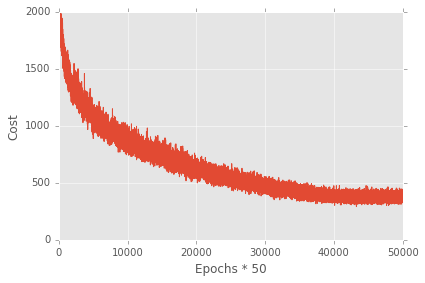

In [8]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs * 50')
plt.tight_layout()
plt.show()

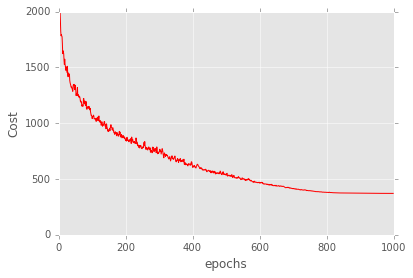

In [9]:
batches = np.array_split(range(len(nn.cost_)), 1000)
cost_ary = np.array(nn.cost_)
cost_avgs = [np.mean(cost_ary[i]) for i in batches]

plt.plot(range(len(cost_avgs)),
         cost_avgs,
         color='red')
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('epochs')
plt.show()

In [10]:
y_train_pred = nn.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / (X_train.shape[0] * 1.0)
print('Training accuracy: %.2f%%' % (acc*100))

Training accuracy: 97.53%


In [11]:
y_test_pred = nn.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / (X_test.shape[0] * 1.0)
print('Test accuracy: %.2f%%' % (acc*100))

Test accuracy: 95.90%


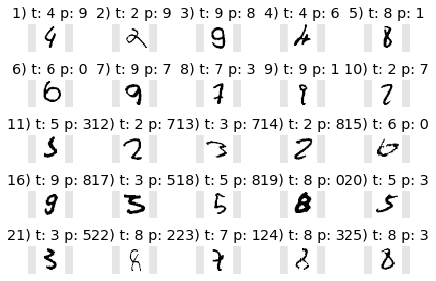

In [12]:
# Examine images that the NN struggles with
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5,
                       ncols=5,
                       sharex=True,
                       sharey=True)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img,
                 cmap='Greys',
                 interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d'
                    % (i+1, correct_lab[i], miscl_lab[i]))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()